# Week - 1 Excercise - 1 - DSE 3159
By-

Pratinav Seth 200968216

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from tensorflow import keras
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


In [2]:
(x_train_full, y_train_full),(x_test_full,y_test_full) = tf.keras.datasets.fashion_mnist.load_data()

## Q1. Find No of classes

Unique Classes in the dataset

In [3]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**No of Unique Classes**

In [4]:
len(np.unique(y_train_full))

10

## Q2. Find Dimensions of each Image

**Dimensions of each image in the dataset**

In [5]:
x_train_full[0].shape

(28, 28)

## Q3. Display One Image from each class

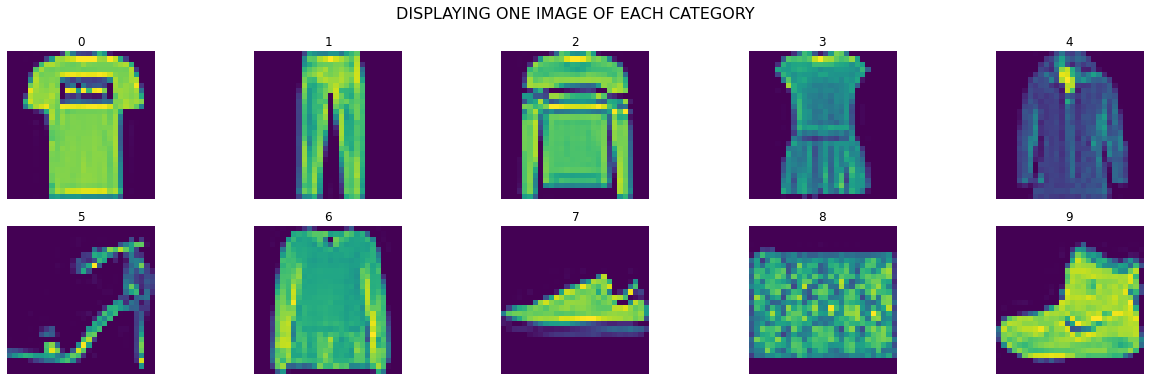

In [6]:
fig, ax= plt.subplots(nrows= 2, ncols= 5, figsize= (18,5))
plt.suptitle('displaying one image of each category'.upper(), y= 1.05, fontsize= 16)

i= 0
for j in range(2):
  for k in range(5):
    ax[j,k].imshow(x_train_full[list(y_train_full).index(i)])
    ax[j,k].axis('off')
    ax[j,k].set_title(i)
    i+=1

plt.tight_layout()
plt.show()

## Q4. Perform Normalization 

In [7]:
x_train_full = x_train_full/255.0
x_test_full = x_test_full/255.0

## Q5. Build Two Neural Networks with 2 hidden layers and 5 hidden layers

**Part-1 - Model 1 - 2 Hidden Layers**

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"))
model.add(tf.keras.layers.Dense(500, activation="relu", name="HiddenLayer1"))
model.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"))
model.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 500)               392500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               50100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


**Part-2 - Model 2 - 5 Hidden Layers**

In [9]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"))
model1.add(tf.keras.layers.Dense(256, activation="relu", name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer2"))
model1.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer3"))
model1.add(tf.keras.layers.Dense(32, activation="relu", name="HiddenLayer4"))
model1.add(tf.keras.layers.Dense(16, activation="relu", name="HiddenLayer5"))
model1.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 256)               200960    
                                                                 
 HiddenLayer2 (Dense)        (None, 128)               32896     
                                                                 
 HiddenLayer3 (Dense)        (None, 64)                8256      
                                                                 
 HiddenLayer4 (Dense)        (None, 32)                2080      
                                                                 
 HiddenLayer5 (Dense)        (None, 16)                528       
                                                                 
 outputLayer (Dense)         (None, 10)               

## Q6. Train and Test the above two networks

**Part-1 - Model 1 - 2 Hidden Layers**

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size = 32
epochs = 15
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4800 - accuracy: 0.8278 - val_loss: 0.3936 - val_accuracy: 0.8575
Epoch 2/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3599 - accuracy: 0.8682 - val_loss: 0.3696 - val_accuracy: 0.8587
Epoch 3/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3256 - accuracy: 0.8795 - val_loss: 0.3511 - val_accuracy: 0.8722
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3028 - accuracy: 0.8879 - val_loss: 0.3333 - val_accuracy: 0.8742
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.8941 - val_loss: 0.3183 - val_accuracy: 0.8833
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2669 - accuracy: 0.9008 - val_loss: 0.3235 - val_accuracy: 0.8837
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2544 - accuracy: 0.9039 - val_loss: 0.3303 - val_accuracy:

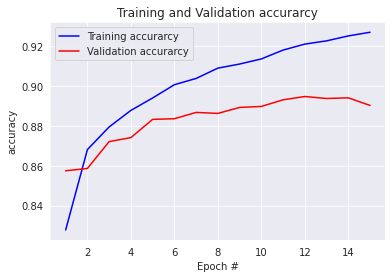

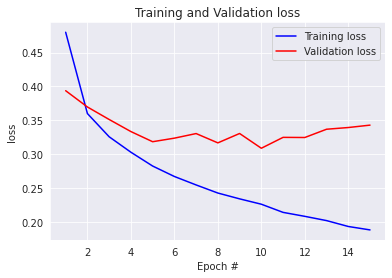

In [11]:
sns.set_style("darkgrid")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()


In [12]:
model.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 2ms/step - loss: 0.3669 - accuracy: 0.8888


[0.3668532073497772, 0.8888000249862671]

**Part-2 - Model 2 - 5 Hidden Layers**

In [13]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size = 32
epochs = 15
history = model1.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5594 - accuracy: 0.7965 - val_loss: 0.4410 - val_accuracy: 0.8385
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3888 - accuracy: 0.8583 - val_loss: 0.3760 - val_accuracy: 0.8648
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3458 - accuracy: 0.8738 - val_loss: 0.3687 - val_accuracy: 0.8650
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3174 - accuracy: 0.8834 - val_loss: 0.3574 - val_accuracy: 0.8710
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3000 - accuracy: 0.8897 - val_loss: 0.3291 - val_accuracy: 0.8795
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2850 - accuracy: 0.8945 - val_loss: 0.3445 - val_accuracy: 0.8737
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2711 - accuracy: 0.8996 - val_loss: 0.3235 - val_accuracy:

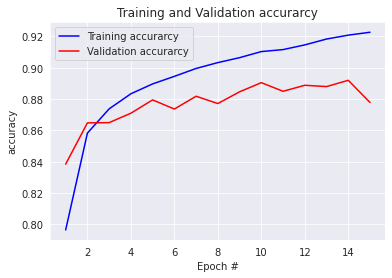

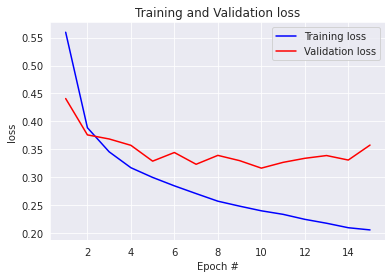

In [14]:
sns.set_style("darkgrid")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [15]:
model1.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 2ms/step - loss: 0.3763 - accuracy: 0.8776


[0.3762848377227783, 0.8776000142097473]

## Q7. Compare their Performances

In [16]:
Y_pred1 = model.predict(x_test_full, len(y_test_full)//batch_size)
y_pred1 = np.argmax(Y_pred1, axis=1)
cm1 = confusion_matrix(y_test_full, y_pred1)
Y_pred2 = model1.predict(x_test_full, len(y_test_full)//batch_size)
y_pred2 = np.argmax(Y_pred2, axis=1)
cm2 = confusion_matrix(y_test_full, y_pred2)

Model - 1 --- Accuracy and Confusion Matrix

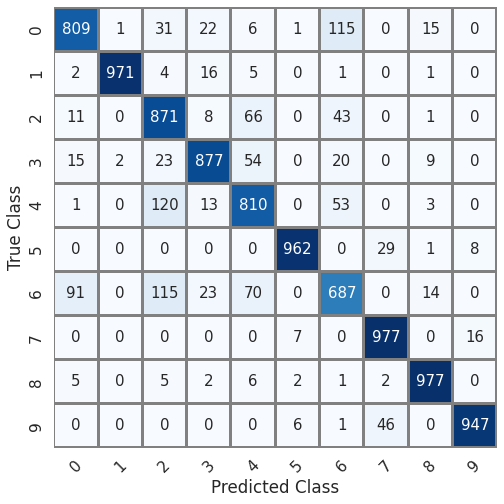

Accuracy 0.8888


In [17]:
array_downsize_upsize_random = cm1

class_labels=["0", "1","2","3","4","5","6","7","8","9"]

confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 45)#, fontsize = 1)
# accuracy = np.trace(array_downsize_upsize_random) / np.sum(array_downsize_upsize_random).astype('float')
# misclass = 1 - accuracy
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#plt.savefig('Downsize+Upsize_Random.png')#, dpi = 1200)
plt.show()
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred1))

Model -- 2 --- Accuracy and Confusion Matrix

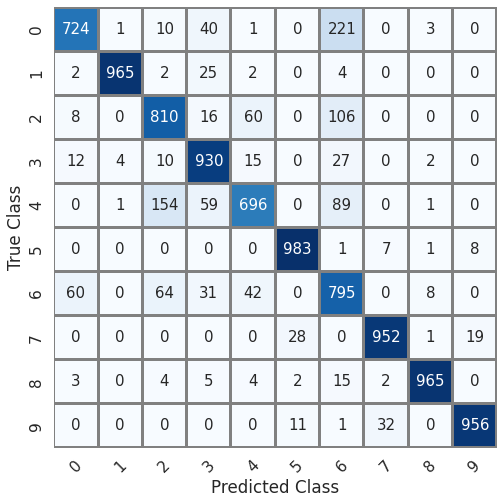

Accuracy 0.8776


In [18]:
array_downsize_upsize_random = cm2
class_labels=["0", "1","2","3","4","5","6","7","8","9"]
confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred2))

Classwise Accuracy Metrics - Model 1

In [19]:
print(classification_report(y_test_full, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1000
           1       1.00      0.97      0.98      1000
           2       0.75      0.87      0.80      1000
           3       0.91      0.88      0.89      1000
           4       0.80      0.81      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.75      0.69      0.72      1000
           7       0.93      0.98      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Classwise Accuracy Metrics - Model 2

In [20]:
print(classification_report(y_test_full, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.84      0.93      0.88      1000
           4       0.85      0.70      0.76      1000
           5       0.96      0.98      0.97      1000
           6       0.63      0.80      0.70      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



**Inference on Performance**

We observe that-

**Model 1**
- 2 hidden layers 
- test set accuracy of Accuracy 88.88%  

**Model 2** 
- having 5 hidden layers 
- having test set accuracy of 87.76%

Thus, **Model 1** is performing better than **Model 2**.

This is evindent by accuracy and classwise f1 scores as shown above.

This also indicates that due to the simplicity of the dataset the more suitable model will be one with less number of hidden layers as with more numbers of hidden layers models tends to learn features which might be unnecessary and leads to overfitting instead of generalization.
